# Introduction

![Lego](Lego.jpg)

# Importing necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV files

In [16]:
set = pd.read_csv("datasets ml/lego_sets.csv")
set

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [17]:
parent_theme = pd.read_csv("datasets ml/parent_themes.csv")
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


# Data Cleaning

In [19]:
set.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [20]:
set.dropna(inplace=True)

In [21]:
set.isna().sum()

set_num         0
name            0
year            0
num_parts       0
theme_name      0
parent_theme    0
dtype: int64

In [22]:
parent_theme.isna().sum()

id             0
name           0
is_licensed    0
dtype: int64

In [23]:
set.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
10,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland


In [24]:
parent_theme.head()       #This dataset bascially shows which theme is licenced and which is not.

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [25]:
parent_theme["name"].nunique()

111

# Task1 :  What percentage of all licensed sets ever released were Star Wars Themed?

In [27]:
merged_set = set.merge(parent_theme, left_on="parent_theme", right_on="name")
merged_set.drop("name_y", axis=1, inplace=True)
merged_set.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
2,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
3,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False


In [28]:
var = merged_set["parent_theme"].value_counts().get("Star Wars", 0)
print("Number of rows that have 'Star Wars' as its Theme: ", var)

Number of rows that have 'Star Wars' as its Theme:  334


In [29]:
var2 = merged_set["is_licensed"].value_counts().get(True,0)
print("Number of rows that have 'licensed' themes: ", var2)

Number of rows that have 'licensed' themes:  664


In [30]:
perc = (var/var2)*100
print("Percentage of all licenced sets that have Star Wars as its Theme: ", perc)

Percentage of all licenced sets that have Star Wars as its Theme:  50.30120481927711


### <b> Percentage of all licenced sets that have Star Wars as its Theme:  50.30120481927711 %

# Task2 : In which year was Star Wars not the most popular licensed theme?

In [35]:
license_sorted = merged_set[merged_set["is_licensed"]]
license_sorted.sort_values("year")
license_sorted["count"] = 1

license_sorted.head()

C:\Users\Think\AppData\Local\Temp\ipykernel_16692\2970762054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  license_sorted["count"] = 1


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
29,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True,1
35,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
53,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True,1
65,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
68,10129-1,Rebel Snowspeeder - UCS,2003,1456.0,Star Wars Episode 4/5/6,Star Wars,158,True,1


In [65]:
summed_df = license_sorted.groupby(["year", "parent_theme"]).sum().reset_index()
summed_df.head()

,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,7121-17128-17131-17140-17141-17151-17161-1,Naboo SwampSpeeder BikesAnakin's PodracerX-win...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,1106,7,7
1,2000,Disney's Mickey Mouse,4165-14166-14167-14178-1,Minnie's Birthday PartyMickey's Car GarageMick...,405.0,Disney's Mickey MouseDisney's Mickey MouseDisn...,1552,4,4
2,2000,Star Wars,3340-13341-13342-13343-14151270-17115-17124-17...,Star Wars #1 - Sith Minifig PackStar Wars #2 -...,2580.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2528,16,16
3,2001,Harry Potter,4704-14706-14707-14708-14722-14723-1,The Chamber of the Winged KeysForbidden Corrid...,1284.0,Sorcerer's StoneSorcerer's StoneSorcerer's Sto...,1476,6,6
4,2001,Star Wars,10018-165028-165030-165034-17106-17166-17186-1...,Darth MaulStar Wars Co-Pack of 7115 7124 and 7...,2949.0,Star WarsStar Wars Episode 1Star Wars Episode ...,1422,9,9


In [80]:
new_df = summed_df.sort_values("count", ascending=True).drop_duplicates('year')
new_df

#By this code we keep the most popular theme of that year and drop the other themes of that year.

,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
18,2006,Star Wars,6206-16207-16208-16209-16211-1,TIE InterceptorA-wing FighterB-wing FighterSla...,2769.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,790,5,5
0,1999,Star Wars,7121-17128-17131-17140-17141-17151-17161-1,Naboo SwampSpeeder BikesAnakin's PodracerX-win...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,1106,7,7
4,2001,Star Wars,10018-165028-165030-165034-17106-17166-17186-1...,Darth MaulStar Wars Co-Pack of 7115 7124 and 7...,2949.0,Star WarsStar Wars Episode 1Star Wars Episode ...,1422,9,9
11,2004,Star Wars,445062-14478-24492-14494-14495-14501-24502-269...,Star Wars Co-Pack of 4500 and 4504Geonosian Fi...,1659.0,Star Wars Episode 4/5/6Star Wars Episode 2Mini...,1738,11,11
21,2007,Star Wars,10178-110179-166221-17656-17657-17658-17659-17...,Motorized Walking AT-ATMillennium Falcon - UCS...,11361.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,1896,12,12
39,2011,Star Wars,20021-130053-130054-130055-15000067-166378-166...,Bounty Hunter Gunship - MiniRepublic Attack Cr...,3451.0,Star Wars Clone WarsStar Wars Episode 3Star Wa...,2370,15,15
25,2008,Star Wars,10186-120006-17667-17668-17669-27670-27671-176...,General GrievousClone Turbo Tank - MiniImperia...,6865.0,Star Wars Episode 3Star Wars Episode 3Star War...,2370,15,15
8,2003,Star Wars,10123-110129-13219-14207901-14477-14481-14482-...,Cloud CityRebel Snowspeeder - UCSTIE Fighter -...,6660.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,2528,16,16
2,2000,Star Wars,3340-13341-13342-13343-14151270-17115-17124-17...,Star Wars #1 - Sith Minifig PackStar Wars #2 -...,2580.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2528,16,16
6,2002,Star Wars,10030-14195641-165106-165145-17103-17113-17119...,Imperial Star Destroyer - UCSStar Wars Co-Pack...,4735.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,2528,16,16


### <b> According to the above table we see that in 2017 Super Heroes theme is most popular and in all other years Star Wars is popular.So our answer is "2017"

# Task 3: How many unique sets were released each year?

In [114]:
merged_set['set_num'].duplicated().sum()

0

In [90]:
merged_set.head(5)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
2,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
3,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False


In [98]:
grouped_df = merged_set.groupby("year").size().reset_index(name="count")
grouped_df.head()

,year,count
0,1950,3
1,1953,1
2,1954,7
3,1955,18
4,1956,9


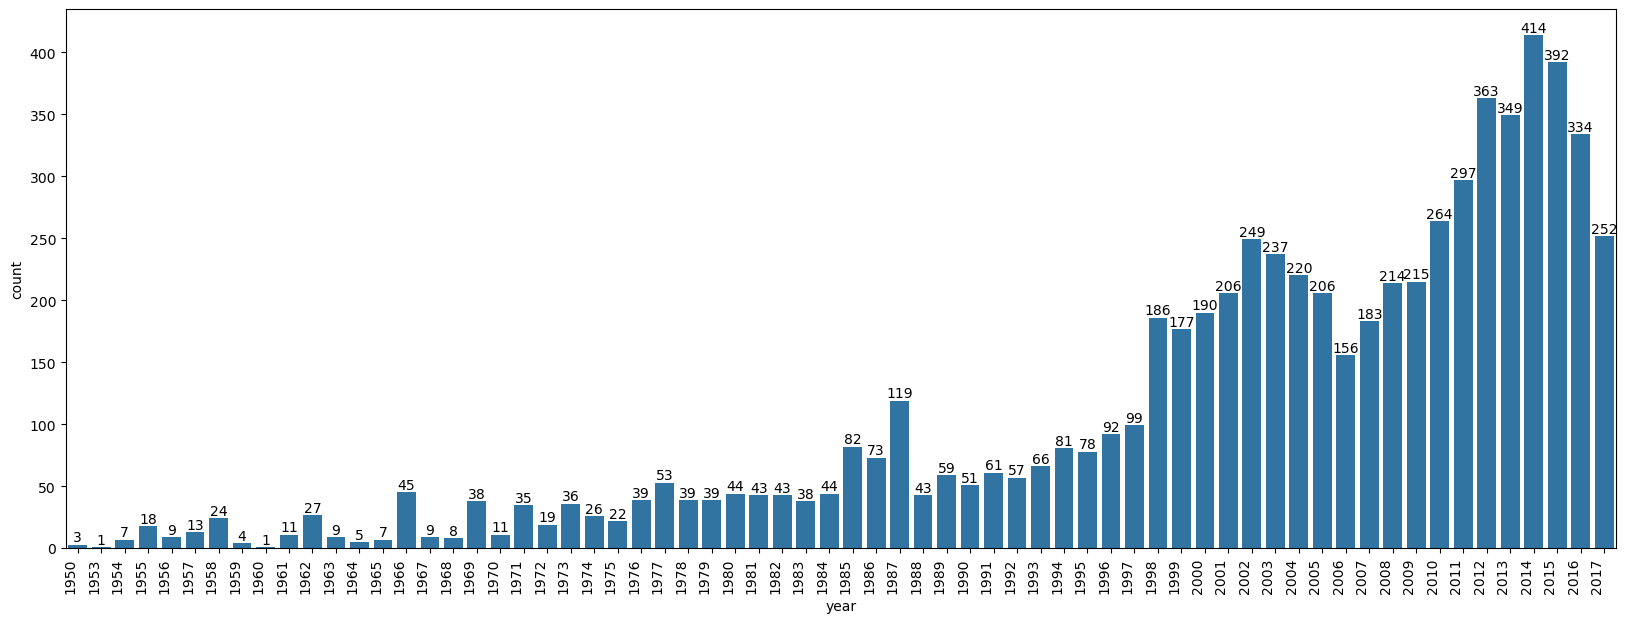

In [116]:
plt.figure(figsize= (20,7))
ax = sns.barplot(data=grouped_df, x="year", y="count")
plt.xticks(rotation=90, ha="right")

for bars in ax.containers:
    ax.bar_label(bars)

### <b> From the above graph we can see each year how many unique sets has been released. 